# Prova Componentização e Reúso de Software 2019
# INF331
*24/08/2019*

# Parte 1 - Componentes na Web

A primeira parte da prova será voltada a componentes na Web usando a implementação do Digital Content Component (DCC).

Utilize o ambiente [DCC Playground](https://ds4h.org/harena-space/src/adonisjs/public/dccs/playground/) testar a sua resposta das questões da `Parte 1`, em seguida, copie e cole a resposta na respectiva resposta.

Utilize o ambiente da seguinte maneira:
1. Escreva o código em HTML no painel `Editor`
2. Clique no botão `Render` para que ele execute o código
3. Veja o resultado da execução no painel `Result`
4. Mensagens enviadas por componentes podem ser vistas no painel `Messages`

Para consultar a sintaxe e ver exemplos dos DCCs veja a [Referência dos DCCS](https://ds4h.org/harena-space/src/adonisjs/public/dccs/).

## Questão 1 [1 ponto]

Codifique um botão com o rótulo `"Inicia"` que ao ser clicado envie uma mensagem com o tópico `"button/start"` e corpo da mensagem `"Inicia processo"`.

~~~html
<dcc-lively-talk duration="2s"
                 character="nurse"
                 speech="Doctor, please you have to evaluate a man!">
</dcc-lively-talk>
~~~

## Questão 2 [2 pontos]

Crie um personagem `patient` usando o `<dcc-lively-talk>` com um balão de mensagens escrito `"Estou me sentindo bem"`.

Acrescente dois botões:
* o primeiro tem rótulo `"Sentindo mal"` e, ao ser clicado, faz a mensagem do balão do `patient` mudar para `"Estou me sentindo mal"`;
* o segundo tem rótulo `"Sentindo bem"` e, ao ser clicado, faz a mensagem do balão do `patient` mudar para `"Estou me sentindo bem"`.

## Questão 3 [2 pontos]

Crie quatro botões com rótulos `Mundo`, `Brasil P`, `Brasil E` e `Bahia` que, ao serem clicados, publiquem notícias nos seguintes tópicos:
* `noticia/mundo/politica`
* `noticia/brasil/politica`
* `noticia/brasil/esporte`
* `noticia/bahia/esporte`

O segundo nível do tópico indica a região da notícia e o terceiro o assunto. Associe a cada tópico o texto de uma mensagem de sua criação.

Crie três personagens (`doctor`, `nurse` e `patient`) usando o `<dcc-lively-talk>`. Cada um deles deve mostrar seletivamente (em seu balão) notícias publicadas pelos botões, conforme os seguintes critérios:
* `doctor` - mostra notícias sobre política (independentemente de região);
* `nurse` - mostra notícias cuja região é o Brasil (independentemente do assunto);
* `patient` - mostra todas as notícias.

# Parte 2 - Componentes em Java

A segunda parte da prova será voltada a componentes em Java usando o catálogo de componentes fornecido. Este catálogo é o mesmo adotado em sala de aula.

A seguir são codificadas as interfaces e classes dos componentes que você precisará para responder as suas questões. No final do notebook, há duas questões para serem resolvidas.

## DataSet

In [1]:
public interface ITableProducer {
    
    String[] requestAttributes();
    String[][] requestInstances();

}

com.twosigma.beaker.javash.bkrbe012f82.ITableProducer

In [2]:
public interface IDataSetProperties {

    public String getDataSource();
    public void setDataSource(String dataSource);

}

com.twosigma.beaker.javash.bkrbe012f82.IDataSetProperties

In [3]:
public interface IDataSet extends IDataSetProperties, ITableProducer {
    
}

com.twosigma.beaker.javash.bkrbe012f82.IDataSet

In [4]:
import java.io.BufferedReader;
import java.io.FileReader;
import java.io.IOException;
import java.util.ArrayList;

public class DataSetComponent implements IDataSet {
  private String dataSource = null;
  private String[] attributes = null;
  private String[][] instances = null;
  
  public DataSetComponent() {
    /* nothing */
  }

  public String getDataSource() {
    return dataSource;
  }

  public void setDataSource(String dataSource) {
    this.dataSource = dataSource;
    if (dataSource == null) {
      attributes = null;
      instances = null;
    } else
      readDS();
  }
  
  public String[] requestAttributes() {
    return attributes;
  }
  
  public String[][] requestInstances() {
    return instances;
  }
  
  private void readDS() {
    ArrayList<String[]> instArray = new ArrayList<String[]>();
    try {
      BufferedReader file = new BufferedReader(new FileReader(dataSource));
        
      String line = file.readLine();
      if (line != null) {
        attributes = line.split(",");
        line = file.readLine();
        while (line != null) {
          String[] instLine = line.split(",");
          instArray.add(instLine);
          line = file.readLine();
        }
        instances = instArray.toArray(new String[0][]);
      }
        
      file.close();
    } catch (IOException erro) {
      erro.printStackTrace();
    }
  }
  
}

com.twosigma.beaker.javash.bkrbe012f82.DataSetComponent

In [5]:
try {
    IDataSet ds = new DataSetComponent();
    ds.setDataSource("../../../../src/db/datasets/zombie/complete/zombie-health-spreadsheet-ml-training.csv");

    System.out.println("=== Attributes ===");
    String attributes[] = ds.requestAttributes();
    for (int a = 0; a < attributes.length-1; a++)
      System.out.print(attributes[a] + ", ");
    System.out.println(attributes[attributes.length-1]);

    System.out.println();
    System.out.println("=== Instances ===");
    String instances[][] = ds.requestInstances();
    for (int i = 0; i < instances.length; i++) {
      for (int a = 0; a < attributes.length-1; a ++)
        System.out.print(instances[i][a] + ", ");
      System.out.println(instances[i][attributes.length-1]);
    }

} catch (Exception e) {
    e.printStackTrace();
}

=== Attributes ===
name, age, paralysis, yellow_tong, member_loss, chest_pain, trembling_finger, severe_anger, history_bacteria, diagnostic, days_recovery, has_disease

=== Instances ===
Rot Donnadd, 43, t, t, f, f, f, f, f, bacterial_infection, 9, t
Pid Mught, 38, f, t, f, f, f, f, f, bacterial_infection, 7, t
Thulk Lebbimp, 63, f, t, f, f, t, f, t, bite_deficit, 10, t
Bouvossam Damme, 71, f, t, t, f, t, f, f, bite_deficit, 13, t
Pirg Zall, 48, f, f, t, t, f, f, f, viral_infection, 4, t
Nullon Rackindock, 23, f, f, t, f, f, t, f, fights, 8, f
Shor Splitturch, 35, f, f, f, f, f, t, f, nothing, 0, f
Ger Ackeng, 66, f, f, f, f, t, f, f, bite_deficit, 11, t
Gleldo Shruck, 45, f, t, f, t, f, f, f, bacterial_infection, 8, t
Nadross Pilch, 60, f, f, f, t, f, f, f, viral_infection, 8, t
Sadrent Pemmir, 73, f, t, t, f, f, f, t, bite_deficit, 14, t
Read Rait, 55, t, t, f, f, f, f, f, bacterial_infection, 9, t
Dallun Whadder, 15, f, f, f, t, f, f, t, viral_infection, 2, t
Eapplar Thorg, 25, f, f

null

## Console

In [6]:
public interface ITableReceptacle {
  public void connect(ITableProducer producer);
}

com.twosigma.beaker.javash.bkrbe012f82.ITableReceptacle

In [7]:
public interface IConsoleUpdate {
  public void update();
}

com.twosigma.beaker.javash.bkrbe012f82.IConsoleUpdate

In [8]:
public interface IConsole extends ITableReceptacle, IConsoleUpdate {
}

com.twosigma.beaker.javash.bkrbe012f82.IConsole

In [9]:
public class ConsoleComponent implements IConsole {
  private ITableProducer iProducer;
  
  public void connect(ITableProducer producer) {
    iProducer = producer;
  }
  
  public void update() {
    if (iProducer != null) {
        System.out.println("=== Attributes ===");
        String attributes[] = iProducer.requestAttributes();
        for (int a = 0; a < attributes.length-1; a++)
          System.out.print(attributes[a] + ", ");
        System.out.println(attributes[attributes.length-1]);

        System.out.println();
        System.out.println("=== Instances ===");
        String instances[][] = iProducer.requestInstances();
        for (int i = 0; i < instances.length; i++) {
          for (int a = 0; a < attributes.length-1; a ++)
            System.out.print(instances[i][a] + ", ");
          System.out.println(instances[i][attributes.length-1]);
        }
    }
  }
}

com.twosigma.beaker.javash.bkrbe012f82.ConsoleComponent

In [10]:
try {
        IDataSet dataset = new DataSetComponent();
        dataset.setDataSource("../../../../src/db/datasets/zombie/complete/zombie-health-spreadsheet-ml-training.csv");

        IConsole console = new ConsoleComponent();
        console.connect(dataset);

        console.update();
    
    } catch (Exception e) {
    
        e.printStackTrace();
    
    }

=== Attributes ===
name, age, paralysis, yellow_tong, member_loss, chest_pain, trembling_finger, severe_anger, history_bacteria, diagnostic, days_recovery, has_disease

=== Instances ===
Rot Donnadd, 43, t, t, f, f, f, f, f, bacterial_infection, 9, t
Pid Mught, 38, f, t, f, f, f, f, f, bacterial_infection, 7, t
Thulk Lebbimp, 63, f, t, f, f, t, f, t, bite_deficit, 10, t
Bouvossam Damme, 71, f, t, t, f, t, f, f, bite_deficit, 13, t
Pirg Zall, 48, f, f, t, t, f, f, f, viral_infection, 4, t
Nullon Rackindock, 23, f, f, t, f, f, t, f, fights, 8, f
Shor Splitturch, 35, f, f, f, f, f, t, f, nothing, 0, f
Ger Ackeng, 66, f, f, f, f, t, f, f, bite_deficit, 11, t
Gleldo Shruck, 45, f, t, f, t, f, f, f, bacterial_infection, 8, t
Nadross Pilch, 60, f, f, f, t, f, f, f, viral_infection, 8, t
Sadrent Pemmir, 73, f, t, t, f, f, f, t, bite_deficit, 14, t
Read Rait, 55, t, t, f, f, f, f, f, bacterial_infection, 9, t
Dallun Whadder, 15, f, f, f, t, f, f, t, viral_infection, 2, t
Eapplar Thorg, 25, f, f

null

## Projeção

In [11]:
public interface IProjectionProperties {
  String[] getAttributes();
  void setAttributes(String attribute[]);
}

com.twosigma.beaker.javash.bkrbe012f82.IProjectionProperties

In [12]:
public interface IProjection extends IProjectionProperties, ITableProducer, ITableReceptacle {
}

com.twosigma.beaker.javash.bkrbe012f82.IProjection

In [13]:
public class ProjectionComponent implements IProjection {
  private ITableProducer provider;
  
  private String attributes[] = null;
  
  public String[] getAttributes() {
    return attributes;
  }

  public void setAttributes(String attributes[]) {
    this.attributes = attributes;
  }
  
  public void connect(ITableProducer provider) {
    this.provider = provider;
  }
  
  public String[] requestAttributes() {
    return attributes;
  }
  
  public String[][] requestInstances() {
    String[][] instances = null;
    
    if (provider != null) {
      String[][] allInstances = provider.requestInstances();
      if (allInstances != null  && attributes != null) {
        instances = new String[allInstances.length][];
        
        // busca a posicao dos atributos selecionados na tabela original
        String[] allAttributes = provider.requestAttributes();
        int attrPos[] = new int[attributes.length];
        for (int as = 0; as < attributes.length; as++) {
          int aa;
          for (aa = 0; aa < allAttributes.length &&
               !attributes[as].equalsIgnoreCase(allAttributes[aa]); aa++)
            /* nothing */;
          if (aa < allAttributes.length)
            attrPos[as] = aa;
          else
            attrPos[as] = -1;
        }
        
        // filtra atributos selecionados
        for (int i = 0; i < allInstances.length; i++) {
          instances[i] = new String[attributes.length];
          for (int as = 0; as < attributes.length; as++)
            if (attrPos[as] > -1)
              instances[i][as] = allInstances[i][attrPos[as]];
        }
      }
    }
    
    return instances;
  }
}

com.twosigma.beaker.javash.bkrbe012f82.ProjectionComponent

In [14]:
try {
    IDataSet dataset = new DataSetComponent();
    dataset.setDataSource("../../../../src/db/datasets/zombie/complete/zombie-health-spreadsheet-ml-training.csv");

    IProjection projection = new ProjectionComponent();
    projection.connect(dataset);

    IConsole console = new ConsoleComponent();
    console.connect(projection);

    String[] attributes = {"name", "age"};
    projection.setAttributes(attributes);
    console.update();
} catch (Exception e) {
    e.printStackTrace();
}

=== Attributes ===
name, age

=== Instances ===
Rot Donnadd, 43
Pid Mught, 38
Thulk Lebbimp, 63
Bouvossam Damme, 71
Pirg Zall, 48
Nullon Rackindock, 23
Shor Splitturch, 35
Ger Ackeng, 66
Gleldo Shruck, 45
Nadross Pilch, 60
Sadrent Pemmir, 73
Read Rait, 55
Dallun Whadder, 15
Eapplar Thorg, 25
Blottork Patter, 68
Darrutt Bottall, 75
Gallir Shauch, 20
Dirpe Polnay, 39
Harrimp Fottiem, 65


null

## Seleção

In [15]:
public interface ISelectionProperties {
  String getAttribute();
  void setAttribute(String attributeA);
  public String getOperator();
  public void setOperator(String operator);
  public String getValue();
  public void setValue(String value);
  boolean isNominalComparison();
  void setNominalComparison(boolean nominalComparison);
}

com.twosigma.beaker.javash.bkrbe012f82.ISelectionProperties

In [16]:
public interface ISelection extends ISelectionProperties, ITableProducer, ITableReceptacle {
}

com.twosigma.beaker.javash.bkrbe012f82.ISelection

In [17]:
import java.util.ArrayList;

public class SelectionComponent implements ISelection {
  private ITableProducer provider;
  
  private String attribute = null,
                 operator = null,
                 value = null;
  private boolean nominalComparison = true;
  
  public String getAttribute() {
    return attribute;
  }

  public void setAttribute(String attribute) {
    this.attribute = attribute;
  }
  
  public String getOperator() {
    return operator;
  }
  
  public void setOperator(String operator) {
    this.operator = operator;
  }
  
  public String getValue() {
    return value;
  }
  
  public void setValue(String value) {
    this.value = value;
  }
  
  public boolean isNominalComparison() {
    return nominalComparison;
  }

  public void setNominalComparison(boolean nominalComparison) {
    this.nominalComparison = nominalComparison;
  }

  public void connect(ITableProducer provider) {
    this.provider = provider;
  }
  
  public String[] requestAttributes() {
    return (provider == null) ? null : provider.requestAttributes();
  }
  
  public String[][] requestInstances() {
    ArrayList<String[]> instances = null;
    
    if (provider != null) {
      String[][] allInstances = provider.requestInstances();
      
      if (allInstances != null) {
        // busca a posicao dos atributos selecionados na tabela original
        String[] allAttributes = provider.requestAttributes();
        int atrPos;
        for (atrPos = 0; atrPos < allAttributes.length &&
             !attribute.equalsIgnoreCase(allAttributes[atrPos]); atrPos++)
          /* nothing */;
        if (atrPos < allAttributes.length) {
          instances = new ArrayList<String[]>();
          
          for (String[] ai: allInstances) {
            boolean match = false;
            if (nominalComparison) {
              switch (operator.charAt(0)) {
                case '=': if (ai[atrPos].equalsIgnoreCase(value))
                       match = true;
                     break;
                case '<': if (ai[atrPos].compareTo(value) < 0)
                       match = true;
                     break;
                case '>': if (ai[atrPos].compareTo(value) > 0)
                       match = true;
                     break;
                case '!': if (!ai[atrPos].equalsIgnoreCase(value))
                     match = true;
                     break;
              }
            } else {
              switch (operator.charAt(0)) {
                case '=': if (Double.parseDouble(ai[atrPos]) == Double.parseDouble(value))
                            match = true;
                          break;
                case '<': if (Double.parseDouble(ai[atrPos]) < Double.parseDouble(value))
                            match = true;
                          break;
                case '>': if (Double.parseDouble(ai[atrPos]) > Double.parseDouble(value))
                            match = true;
                          break;
                case '!': if (Double.parseDouble(ai[atrPos]) != Double.parseDouble(value))
                            match = true;
                          break;
              }
            }
            if (match)
              instances.add(ai);
                
          }
        }
      }
    }
    
    return (instances == null) ? null : instances.toArray(new String[1][]);
  }
}

com.twosigma.beaker.javash.bkrbe012f82.SelectionComponent

In [18]:
try {
    IDataSet dataset = new DataSetComponent();
    dataset.setDataSource("../../../../src/db/datasets/zombie/complete/zombie-health-spreadsheet-ml-training.csv");

    ISelection selection = new SelectionComponent();
    selection.connect(dataset);
    selection.setAttribute("diagnostic");
    selection.setOperator("=");
    selection.setValue("bacterial_infection");

    IConsole console = new ConsoleComponent();
    console.connect(selection);
    console.update();
} catch (Exception e) {
    e.printStackTrace();
}

=== Attributes ===
name, age, paralysis, yellow_tong, member_loss, chest_pain, trembling_finger, severe_anger, history_bacteria, diagnostic, days_recovery, has_disease

=== Instances ===
Rot Donnadd, 43, t, t, f, f, f, f, f, bacterial_infection, 9, t
Pid Mught, 38, f, t, f, f, f, f, f, bacterial_infection, 7, t
Gleldo Shruck, 45, f, t, f, t, f, f, f, bacterial_infection, 8, t
Read Rait, 55, t, t, f, f, f, f, f, bacterial_infection, 9, t
Dirpe Polnay, 39, f, t, f, f, f, f, f, bacterial_infection, 7, t


null

## Chart

In [19]:
public interface IChartProperties {
    
    String getTitle();
    void setTitle(String title);
    String getXTitle();
    void setXTitle(String title);
    String getYTitle();
    void setYTitle(String title);

}

com.twosigma.beaker.javash.bkrbe012f82.IChartProperties

In [20]:
public interface IRun {

    public boolean start();
    public boolean stop();
    
}

com.twosigma.beaker.javash.bkrbe012f82.IRun

In [21]:
public interface IChart extends ITableReceptacle, IRun, IChartProperties {
    
    /* Component Interfaces Set */

}

com.twosigma.beaker.javash.bkrbe012f82.IChart

In [22]:
%classpath add jar ../../../../src/lib/xchart-3.5.2.jar

In [23]:
import java.util.ArrayList;
import java.util.Hashtable;
import java.util.List;

import java.io.IOException;

import org.knowm.xchart.BubbleChart;
import org.knowm.xchart.BubbleChartBuilder;
import org.knowm.xchart.SwingWrapper;
import org.knowm.xchart.BitmapEncoder;
import org.knowm.xchart.BitmapEncoder.BitmapFormat;

import com.twosigma.beakerx.mimetype.MIMEContainer;
import java.io.File;
import java.nio.file.Files;

public class ChartBubbleComponent implements IChart {
  private BubbleChart chart = null;

  private String title = "Chart";
  private String xTitle = "X",
                 yTitle = "Y";

  private ITableProducer producer = null;
 
  public void connect(ITableProducer producer) {
    this.producer = producer;
  }
  
  public ChartBubbleComponent() {
  }
  
  public String getTitle() {
    return title;
  }
  
  public void setTitle(String title) {
    this.title = title;
  }

  public String getXTitle() {
    return xTitle;
  }
  
  public void setXTitle(String title) {
    xTitle = title;
  }

  public String getYTitle() {
    return title;
  }
  
  public void setYTitle(String title) {
    yTitle = title;
  }

  public boolean start() {
    boolean status = true;
    
    chart = new BubbleChartBuilder().width(600).height(400).title(title).xAxisTitle(xTitle).yAxisTitle(yTitle).build();
    try{
        
        buildChart();         
        BitmapEncoder.saveBitmap(chart, "./chart", BitmapFormat.PNG);
        
        File file = new File("chart.png");
        byte[] data = Files.readAllBytes(file.toPath());
    
        MIMEContainer image = new MIMEContainer(MIMEContainer.MIME.IMAGE_PNG, data);
        display(image);
      }catch(IOException ex){
        status = false;
        System.out.println (ex.toString());      
      }
        
    return status;
  }
  
  public boolean stop() {
    return true;
  }
  
  public double[] toDouble(String[][] instances, int column ) {
    double[] numbers = new double[instances.length];
    for (int i = 0; i < instances.length; i++)
      numbers[i] = Double.parseDouble(instances[i][column]);
    return numbers;
  }

  private void buildChart() {
    if (chart != null && producer != null) {
      String[][] instances = producer.requestInstances();

      if (instances != null) {
        double[] xData = toDouble(instances, 0),
                 yData = toDouble(instances, 1);
        
        String[] categoryData = null;
        if (instances[0].length > 2) {
          categoryData = new String[instances.length];
          for (int c = 0; c < instances.length; c++)
            categoryData[c] = instances[c][2];
        }
        
        double[] bubbleData = null;
        if (instances[0].length > 3)
          bubbleData = toDouble(producer.requestInstances(), 3);
        else {
          bubbleData = new double[instances.length];
          for (int i = 0; i < xData.length; i++)
            bubbleData[i] = 10;
        }
          
        
        if (categoryData == null ||
            xData.length != yData.length || yData.length != bubbleData.length ||
            bubbleData.length != categoryData.length) {
          chart.addSeries(" ", xData, yData, bubbleData);
        } else {
          Hashtable<String,String> hash = new Hashtable<String,String>();
          int outer = 0;
          int size = categoryData.length;
          while (outer < size) {
            if (hash.containsKey(categoryData[outer]))
              outer++;
            else {
              hash.put(categoryData[outer],categoryData[outer]);
              List<Double> xSub = new ArrayList<Double>(),
                           ySub = new ArrayList<Double>(),
                           bubbleSub = new ArrayList<Double>();
              for (int inner = outer; inner < size; inner++)
                if (categoryData[inner].equalsIgnoreCase(categoryData[outer])) {
                  xSub.add(xData[inner]);
                  ySub.add(yData[inner]);
                  bubbleSub.add(bubbleData[inner]);
                }
              chart.addSeries(categoryData[outer], xSub, ySub, bubbleSub);
              outer++;
            }
          }
        }
      }
      
    }
    
  }
  
}

com.twosigma.beaker.javash.bkrbe012f82.ChartBubbleComponent

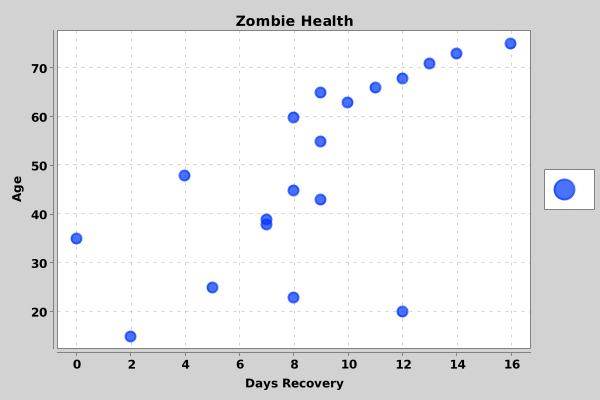

true

In [24]:
IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../../../../src/db/datasets/zombie/complete/zombie-health-spreadsheet-ml-training.csv");

IProjection projection = new ProjectionComponent();
projection.connect(dataset);
String attributes[] = {"days_recovery", "age"};
projection.setAttributes(attributes);

IChart chart = new ChartBubbleComponent();
chart.setTitle("Zombie Health");
chart.setXTitle("Days Recovery");
chart.setYTitle("Age");
chart.connect(projection);

return chart.start();


## Questão 4 [2,5 pontos]

Instancie e conecte os componentes que você achar necessários construir um gráfico XY que mostre dados de Idade (`age`) x Tempo de Recuperação (`days_recovery`) somente para aqueles zumbis que tiveram infecção bacteriana (`bacterial_infection`).

## Statistics

In [25]:
public interface IStatisticsProperties {

    int getSize();

    double[] getValueSet();

    void setValueSet(double[] valueSet);

    double getValueSet(int index);

    void setValueSet(int index, double value);

}

com.twosigma.beaker.javash.bkrbe012f82.IStatisticsProperties

In [26]:
/**
 * Interface for a Statistics Class that registers a set of numbers
 * and calculates the sum and average of these numbers. 
 * 
 * @author Andre Santanche
 */
public interface IStatisticsServices {
   /**
    * Inserts a value into the set.
    * @param value the value to be inserted into the set
    */
    public void insertValue(double value);

    
    /**
     * Calculates the sum of the values in the set. Returns zero if the set is empty.
     * @return sum of the values in the set
     */
    public double sum();
  
    
    /**
     * Calculates the average of the values in the set. Returns zero if the set is empty.
     * @return average of the values in the set
     */
    public double average();
}


com.twosigma.beaker.javash.bkrbe012f82.IStatisticsServices

In [27]:
public interface IStatistics extends IStatisticsServices, IStatisticsProperties {

}

com.twosigma.beaker.javash.bkrbe012f82.IStatistics

In [28]:
import java.util.Vector;

/**
 * Registers a set of numbers and calculates the sum and average of these numbers.
 * 
 * @author Andre Santanche
 */
public class StatisticsComponent implements IStatistics {
   private Vector<Double> valueSet;
   
   /*
    * Constructor
    **************/

   public StatisticsComponent() {
      super();
      valueSet = new Vector<Double>();
   }
   
   public StatisticsComponent(int capacity) {
      super();
      valueSet = new Vector<Double>(capacity);
   }

   /* Properties
    ************/
   
   public int getSize() {
       return valueSet.size();
   }
   
   public double[] getValueSet() {
      int size = valueSet.size();
      double result[] = new double[size];
      for (int d = 0; d < size; d++)
         result[d] = valueSet.get(d);
      return result;
   }

   public void setValueSet(double[] valueSet) {
      for (int d = 0; d < valueSet.length; d++)
         this.valueSet.add(valueSet[d]);
   }
   
   public double getValueSet(int index) {
        return (index < getSize()) ? valueSet.get(index) : 0;
   }
   
   public void setValueSet(int index, double value) {
        int position = (index < getSize()) ? index : getSize();
        if (position < getSize())
            valueSet.set(index, value);
        else
            valueSet.add(value);
   }

   /*
    * IStatisticsServices Interface
    *******************************/
   
   public void insertValue(double value) {
      valueSet.add(value);
   }

   public double sum() {
      double theSum = 0.0f;
      
      for (double value : valueSet)
         theSum += value;
      
      return theSum;
   }

   public double average() {
      double avg = 0;
      
      if (valueSet.size() > 0)
         avg = sum() / valueSet.size();
      
      return avg;
   }
}

com.twosigma.beaker.javash.bkrbe012f82.StatisticsComponent

In [29]:
try {
   IStatistics stat = new StatisticsComponent(3);

   System.out.println("inserido valor: " + 50.0f);
   stat.insertValue(50.0f);
   System.out.println("inserido valor: " + 70.0f);
   stat.insertValue(70.0f);
   System.out.println("inserido valor: " + 30.0f);
   stat.insertValue(30.0f);

   System.out.println("-- somatorio: " + stat.sum());
   System.out.println("-- media: " + stat.average());
   System.out.println("-- tamanho: " + stat.getSize());
} catch (Exception e) {
   e.printStackTrace();
}

inserido valor: 50.0
inserido valor: 70.0
inserido valor: 30.0
-- somatorio: 150.0
-- media: 50.0
-- tamanho: 3


null

## Statistics Required

In [30]:
public interface IRun {
    
    public void start();
    
}

com.twosigma.beaker.javash.bkrbe012f82.IRun

In [31]:
public interface IStatisticsReceptacle{
    
    public void connect(IStatistics provider);
    
}

com.twosigma.beaker.javash.bkrbe012f82.IStatisticsReceptacle

In [32]:
public interface IClientProperties {
    public int getSize();    
    public void setSize(int size);
}

com.twosigma.beaker.javash.bkrbe012f82.IClientProperties

In [33]:
public interface IClient extends IStatisticsReceptacle, IClientProperties, IRun {

}

com.twosigma.beaker.javash.bkrbe012f82.IClient

In [34]:
public class ClientComponent implements IClient {
    public final static int STANDARD_SIZE = 5;
   
    private int size;
    private int first, second;
   
    private IStatistics provider = null;
    
    /*
     * Constructor
     *************/
    
    public ClientComponent() {
      super();
      size = STANDARD_SIZE;
      first = 1;
      second = 1;
    }
    
    /*
     * Properties
     */
    
    public int getSize() {
        return size;
    }
    
    public void setSize(int size) {
        this.size = size;
    }
    
    /*
     * IStatisticsReceptacle Interface
     **********************************/
    
    public void connect(IStatistics provider)
    {
        this.provider = provider;
    }
    
    public int next() {
       int returnNumber = first;
       first = second;
       second = returnNumber + first;
       return returnNumber;
    }
    
    public void start()
    {
       for (int f = 1; f <= size; f++) {
          int nextNumber = next();
          System.out.println("produzido: " + nextNumber);
          provider.insertValue(nextNumber);
       }
   
       System.out.println("-- somatorio: " + provider.sum());
       System.out.println("-- media: " + provider.average());
    }
    
}

com.twosigma.beaker.javash.bkrbe012f82.ClientComponent

## Questão 5 [2,5 pontos]

Tomando como base o [Dataset dos Zumbis](https://github.com/santanche/java2learn/blob/master/src/db/datasets/zombie/complete/zombie-health-spreadsheet-ml-training.csv), instancie e conecte os componentes que você achar necessários para mostrar no console a média do tempo de recuperação (`days_recovery`) dos zumbis.